In [4]:
!pip install hdfs3

In [1]:
from hdfs3 import HDFileSystem

In [2]:
import re

In [3]:
import pandas

In [4]:
hdfs = HDFileSystem(host='manager.novalocal', port=8020)

#### Предположим, что данные, которые поступают из flume - это стоимость акций некомпаний компании А на момент закрытия торгов в каждый отдельный день с момента существование компании

#### Файлы из flume:

In [5]:
li=hdfs.ls ('/hw_lesson7_flume5_2/')
print(li)

['/hw_lesson7_flume5_2/FlumeData.1596135005117', '/hw_lesson7_flume5_2/FlumeData.1596135005118', '/hw_lesson7_flume5_2/FlumeData.1596135005119', '/hw_lesson7_flume5_2/FlumeData.1596135005120', '/hw_lesson7_flume5_2/FlumeData.1596135005121', '/hw_lesson7_flume5_2/FlumeData.1596135005122', '/hw_lesson7_flume5_2/FlumeData.1596135005123', '/hw_lesson7_flume5_2/FlumeData.1596135005124', '/hw_lesson7_flume5_2/FlumeData.1596135005125', '/hw_lesson7_flume5_2/FlumeData.1596135005126', '/hw_lesson7_flume5_2/FlumeData.1596135005127', '/hw_lesson7_flume5_2/FlumeData.1596135005128', '/hw_lesson7_flume5_2/FlumeData.1596135005129', '/hw_lesson7_flume5_2/FlumeData.1596135005130', '/hw_lesson7_flume5_2/FlumeData.1596135005131', '/hw_lesson7_flume5_2/FlumeData.1596135005132', '/hw_lesson7_flume5_2/FlumeData.1596135005133', '/hw_lesson7_flume5_2/FlumeData.1596135005134', '/hw_lesson7_flume5_2/FlumeData.1596135005135', '/hw_lesson7_flume5_2/FlumeData.1596135005136', '/hw_lesson7_flume5_2/FlumeData.1596135

In [6]:
data=[]
for element in li:
    with hdfs.open(element) as file:
        try:
            for element in file:
                element=element.decode('utf-8')
                element=re.findall('\d+',element)[0]
                element=int(element)
                data.append(element)
        except:
            continue

In [13]:
print(data)

[42718, 92275, 16165, 54859, 15720, 55298, 96259, 21839, 54232, 92167, 26459, 77151, 29449, 31162, 68421, 59512, 72184, 11204, 14057, 54871, 25650, 36967, 42763, 71132, 61899, 44744, 53820, 51388, 51323, 48396, 56914, 51498, 88951, 79771, 46205, 94884, 82542, 76068, 14104, 50744, 37118, 7545, 27726, 58632, 11514, 97396, 86493, 43797, 39057, 37994, 94476, 39512, 77627, 74019, 48600, 45339, 76210, 28405, 68964, 30520, 78337, 52996, 32441, 90196, 4425, 19895, 48878, 50553, 35874, 59028, 65038, 49120, 96557, 90875, 91157, 99475, 87931, 82351, 9670, 10875, 91814, 99812, 96570, 50871, 39383, 43836, 96865, 41441, 293, 11366, 58686, 73017, 13387, 60501, 55522, 638, 83371, 51692, 78759, 42755, 87374, 76085, 73906, 69171, 74191, 43503, 2529, 47483, 89213, 66694, 50866, 71779, 46101, 14535, 49028, 75209, 51071, 58565, 81206, 3261, 53678, 2945, 53893, 49530, 65615, 63680, 59889, 16131, 23937, 78271, 38664, 44872, 60, 92152, 33071, 30955, 64823, 36507, 43425, 71647, 48401, 67601, 55827, 59626, 7250

In [8]:
dataset=pandas.DataFrame({'Цена акций компании А':data},columns=['Цена акций компании А'])

#### Стоимость акцией компании А в валюте Б

In [9]:
print(dataset)

       Цена акций компании А
0                      42718
1                      92275
2                      16165
3                      54859
4                      15720
...                      ...
12495                  81632
12496                  53926
12497                  93992
12498                  35559
12499                  65491

[12500 rows x 1 columns]


##### Предположим, что в году в среднем 247 рабочих дней

In [10]:
dataset.count()/247

Цена акций компании А    50.607287
dtype: float64

###### Компания существует 50 с половиной лет. Нас интересует стоимость акций за последний год

In [11]:
dataset_query=dataset.tail(247)

In [12]:
dataset_query.shape

(247, 1)

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

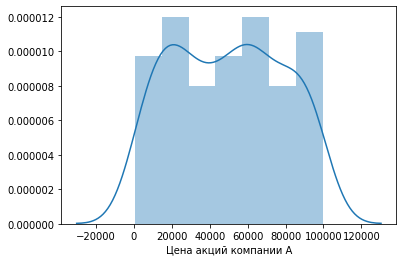

In [15]:
sns.distplot(dataset_query['Цена акций компании А'])
plt.show()

##### Мы видим, что распределение стремится к бимодальному, когда стоимость акций находилась в диапазоне 20000 и 60000-80000. В целом подобное поведение за 1 год говорит о высокой волатильности стоимости акцией, скорее всего деятельность компании за последний год вызывала спекулятивные настроения. Возможно, компания разрабатывала лекарства от COVID-19